# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2384 Кочуров Александр Дмитриевич и Чепасов Дмитрий Витальевич. Вариант №18.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

### Дискретное преобразование Фурье (ДПФ)
Спектр дискретного сигнала $x_n$ (или $s_n$) определяется формулой:
$$X(n) = \sum_{k=0}^{N-1} x_k e^{-i \frac{2\pi n}{N} k}, \quad n=0, 1, \dots, N-1$$

### Нерекурсивные фильтры (сглаживание)
Сглаживание осуществляется с помощью дискретной свертки сигнала с импульсной характеристикой фильтра $h_k$. Для симметричных фильтров передаточная функция (частотная характеристика) $H(\omega)$ имеет вид:
$$H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(k\omega)$$

Спектр выходного сигнала $Y(\omega)$ связан со спектром входного сигнала $X(\omega)$ соотношением:
$$Y(\omega) = H(\omega) X(\omega)$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Пункт 1
Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_kt+\varphi_k)$.
- 11 гармоник.
- Частоты от 0 до $\pi$ с шагом $0.1\pi$.
- Амплитуды $A_k$ — случайные целые от 1 до 11 (нормированные).
- Фазы $\varphi_k$ — случайные от 0 до 0.5.
- Количество отсчетов $N_{total}=32$ (индексы $0..31$).

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
N_harmonics = 11
N_points = 32
T = 1
np.random.seed(42) # Фиксация seed для воспроизводимости

# Генерация параметров гармоник
omegas = np.linspace(0, np.pi, N_harmonics)
amplitudes = np.random.randint(1, 12, N_harmonics).astype(float)
amplitudes /= np.sum(amplitudes) # Нормировка
phases = np.random.uniform(0, 0.5, N_harmonics)

print("Параметры сигнала (Амплитуда, Частота, Фаза):")
for i, (a, w, p) in enumerate(zip(amplitudes, omegas, phases)):
    print(f"{i+1}. A={a:.3f}, w={w:.3f}, phi={p:.3f}")

# Функция аналогового сигнала
def analog_signal(t):
    res = 0
    for a, w, p in zip(amplitudes, omegas, phases):
        res += a * np.cos(w * t + p)
    return res

# Дискретизация
t_discrete = np.arange(N_points) * T
s_discrete = analog_signal(t_discrete)

Параметры сигнала (Амплитуда, Частота, Фаза):
1. A=0.083, w=0.000, phi=0.433
2. A=0.048, w=0.314, phi=0.301
3. A=0.131, w=0.628, phi=0.354
4. A=0.095, w=0.942, phi=0.010
5. A=0.060, w=1.257, phi=0.485
6. A=0.083, w=1.571, phi=0.416
7. A=0.119, w=1.885, phi=0.106
8. A=0.036, w=2.199, phi=0.091
9. A=0.083, w=2.513, phi=0.092
10. A=0.131, w=2.827, phi=0.152
11. A=0.131, w=3.142, phi=0.262


### Пункт 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

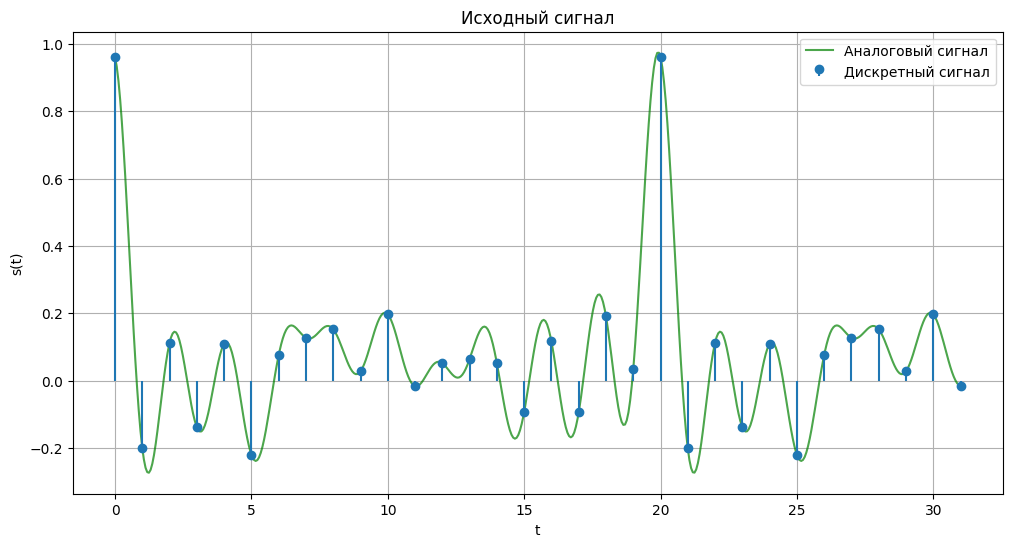

In [18]:
# Для красивого отображения аналогового сигнала возьмем больше точек
t_analog = np.linspace(0, N_points - 1, 500)
s_analog = analog_signal(t_analog)

plt.figure(figsize=(12, 6))
plt.plot(t_analog, s_analog, label='Аналоговый сигнал', color='green', alpha=0.7)
plt.stem(t_discrete, s_discrete, label='Дискретный сигнал', basefmt=" ")
plt.title("Исходный сигнал")
plt.xlabel("t")
plt.ylabel("s(t)")
plt.legend()
plt.grid(True)
plt.show()

### Пункт 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

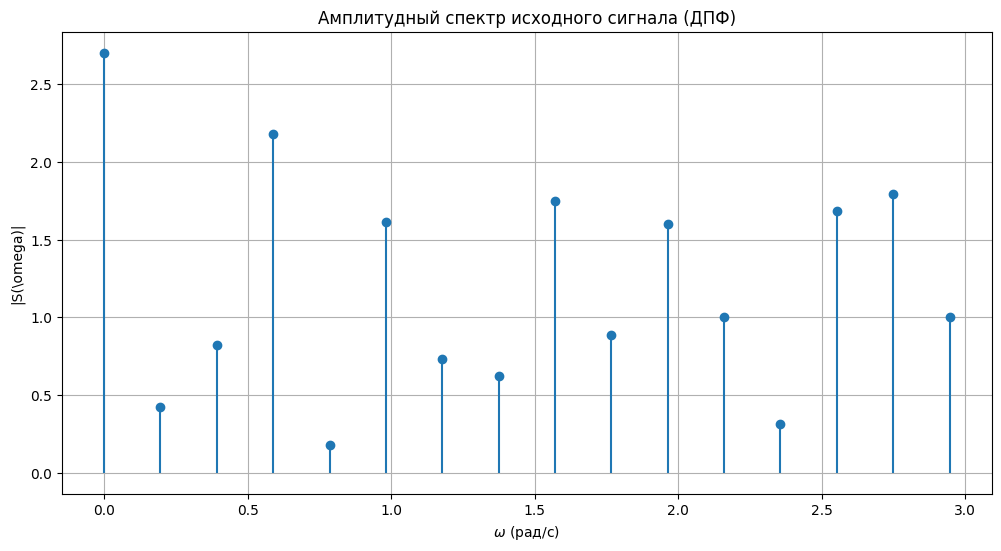

In [19]:
# Вычисление ДПФ
S_spectrum = np.fft.fft(s_discrete)
# Частоты для оси X
freqs = np.fft.fftfreq(N_points, T)
# Перевод в круговую частоту (0..pi)
omegas_fft = 2 * np.pi * freqs

# Берем только первую половину спектра (положительные частоты)
half_n = N_points // 2

plt.figure(figsize=(12, 6))
plt.stem(omegas_fft[:half_n], np.abs(S_spectrum[:half_n]), basefmt=" ")
plt.title("Амплитудный спектр исходного сигнала (ДПФ)")
plt.xlabel(r"$\omega$ (рад/с)")
plt.ylabel("|S(\omega)|")
plt.grid(True)
plt.show()

### Пункт 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$.

**Линейное сглаживание:** весовые коэффициенты $h_k$ равны $\frac{1}{2m+1}$, где $2m+1$ — количество точек.

1. **По 5 точкам** ($m=2$): $h_k = \frac{1}{5}$ для $k \in [-2, 2]$.
   Частотная характеристика:
   $$H_5(\omega) = \frac{1}{5}(1 + 2\cos(\omega) + 2\cos(2\omega))$$

2. **По 9 точкам** ($m=4$): $h_k = \frac{1}{9}$ для $k \in [-4, 4]$.
   Частотная характеристика:
   $$H_9(\omega) = \frac{1}{9}(1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega))$$

In [20]:
def apply_filter(signal, kernel):
    # Используем свертку с режимом 'same', чтобы сохранить размерность.
    # Однако классические формулы часто предполагают потерю краев или их особую обработку.
    # В рамках данной лабораторной, для простоты визуализации, используем np.convolve с 'same'.
    return np.convolve(signal, kernel, mode='same')

# Ядра для линейного сглаживания
h_lin_5 = np.ones(5) / 5
h_lin_9 = np.ones(9) / 9

# Фильтрация
s_lin_5 = apply_filter(s_discrete, h_lin_5)
s_lin_9 = apply_filter(s_discrete, h_lin_9)

# Теоретические АЧХ для графиков
def H_linear(w, m):
    # Сумма геометрической прогрессии или через синусы (ядро Дирихле)
    # H(w) = sin((2m+1)w/2) / ((2m+1) * sin(w/2))
    val = np.sin((2*m+1)*w/2) / ((2*m+1) * np.sin(w/2) + 1e-10)
    return np.abs(val)

### Пункт 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным.

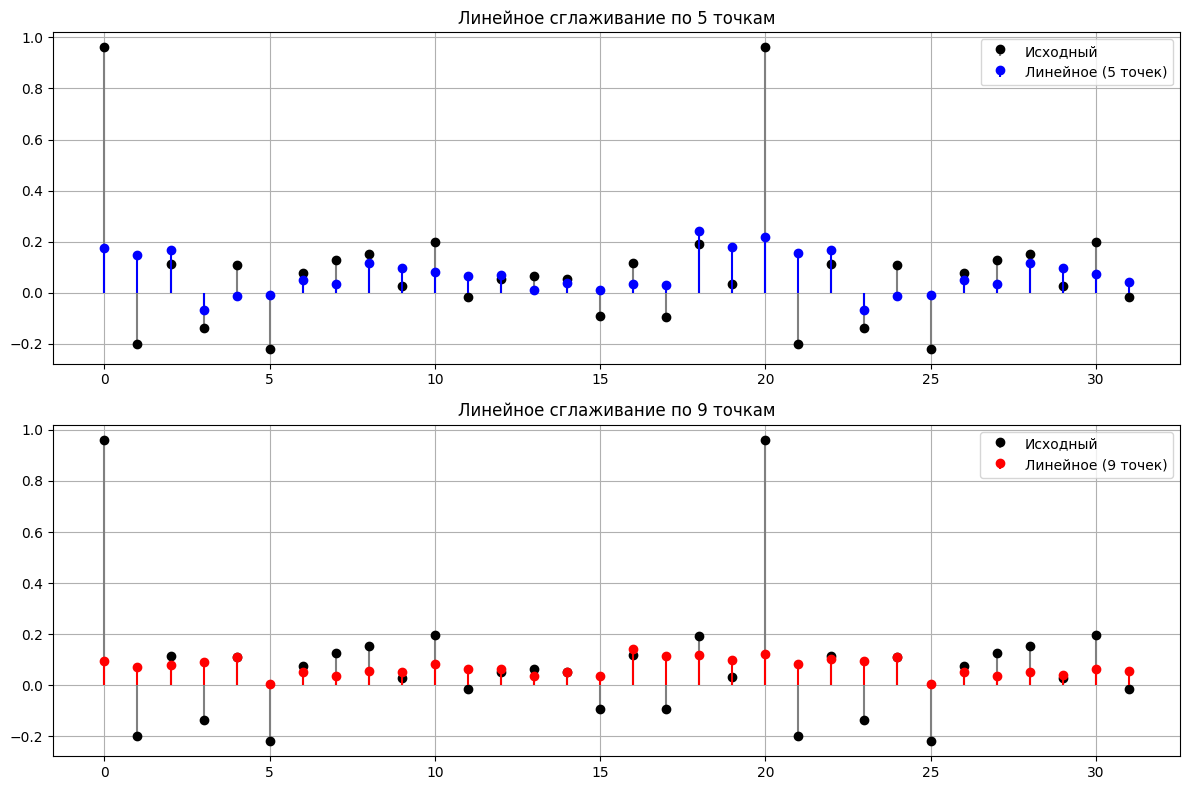

In [21]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.stem(t_discrete, s_discrete, linefmt='grey', markerfmt='ko', basefmt=" ", label='Исходный')
plt.stem(t_discrete, s_lin_5, linefmt='b-', markerfmt='bo', basefmt=" ", label='Линейное (5 точек)')
plt.title("Линейное сглаживание по 5 точкам")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(t_discrete, s_discrete, linefmt='grey', markerfmt='ko', basefmt=" ", label='Исходный')
plt.stem(t_discrete, s_lin_9, linefmt='r-', markerfmt='ro', basefmt=" ", label='Линейное (9 точек)')
plt.title("Линейное сглаживание по 9 точкам")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Пункт 6
С помощью ДПФ найти дискретные отсчеты спектра после фильтрации и визуализировать их совместно с исходным спектром.

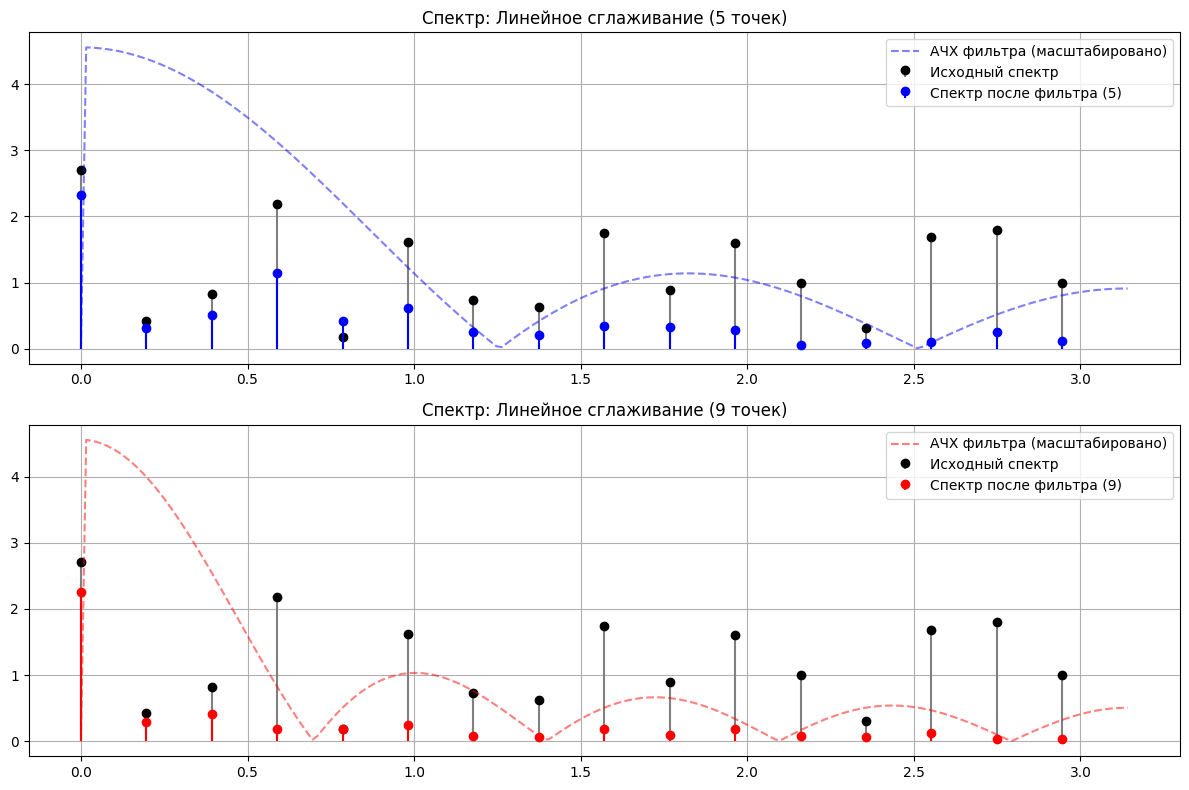

In [22]:
S_lin_5_spec = np.fft.fft(s_lin_5)
S_lin_9_spec = np.fft.fft(s_lin_9)

# Теоретическая огибающая фильтра
w_dense = np.linspace(0, np.pi, 200)
H_lin_5_vals = H_linear(w_dense, 2)
H_lin_9_vals = H_linear(w_dense, 4)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.stem(omegas_fft[:half_n], np.abs(S_spectrum[:half_n]), linefmt='grey', markerfmt='ko', basefmt=" ", label='Исходный спектр')
plt.stem(omegas_fft[:half_n], np.abs(S_lin_5_spec[:half_n]), linefmt='b-', markerfmt='bo', basefmt=" ", label='Спектр после фильтра (5)')
plt.plot(w_dense, H_lin_5_vals * np.max(np.abs(S_spectrum)), 'b--', alpha=0.5, label='АЧХ фильтра (масштабировано)')
plt.title("Спектр: Линейное сглаживание (5 точек)")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(omegas_fft[:half_n], np.abs(S_spectrum[:half_n]), linefmt='grey', markerfmt='ko', basefmt=" ", label='Исходный спектр')
plt.stem(omegas_fft[:half_n], np.abs(S_lin_9_spec[:half_n]), linefmt='r-', markerfmt='ro', basefmt=" ", label='Спектр после фильтра (9)')
plt.plot(w_dense, H_lin_9_vals * np.max(np.abs(S_spectrum)), 'r--', alpha=0.5, label='АЧХ фильтра (масштабировано)')
plt.title("Спектр: Линейное сглаживание (9 точек)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Пункт 7: Анализ
Линейное сглаживание является фильтром нижних частот (ФНЧ). Как видно из графиков, высокочастотные компоненты (в правой части спектра) подавляются. Фильтр по 9 точкам имеет более узкую полосу пропускания, чем фильтр по 5 точкам, поэтому он сильнее подавляет высокие частоты, но также больше ослабляет и средние частоты, что видно по уменьшению амплитуд соответствующих гармоник.

### Пункт 8
Повторить анализ для сглаживания полиномами 2-й и 4-й степеней.

#### Сглаживание полиномом 2-й степени
1. **По 5 точкам** ($m=2$). Коэффициенты: $\frac{1}{35}[-3, 12, 17, 12, -3]$.
   $$H(\omega) = \frac{1}{35}(17 + 24\cos(\omega) - 6\cos(2\omega))$$
2. **По 9 точкам** ($m=4$). Коэффициенты: $\frac{1}{231}[-21, 14, 39, 54, 59, 54, 39, 14, -21]$.
   $$H(\omega) = \frac{1}{231}(59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega))$$

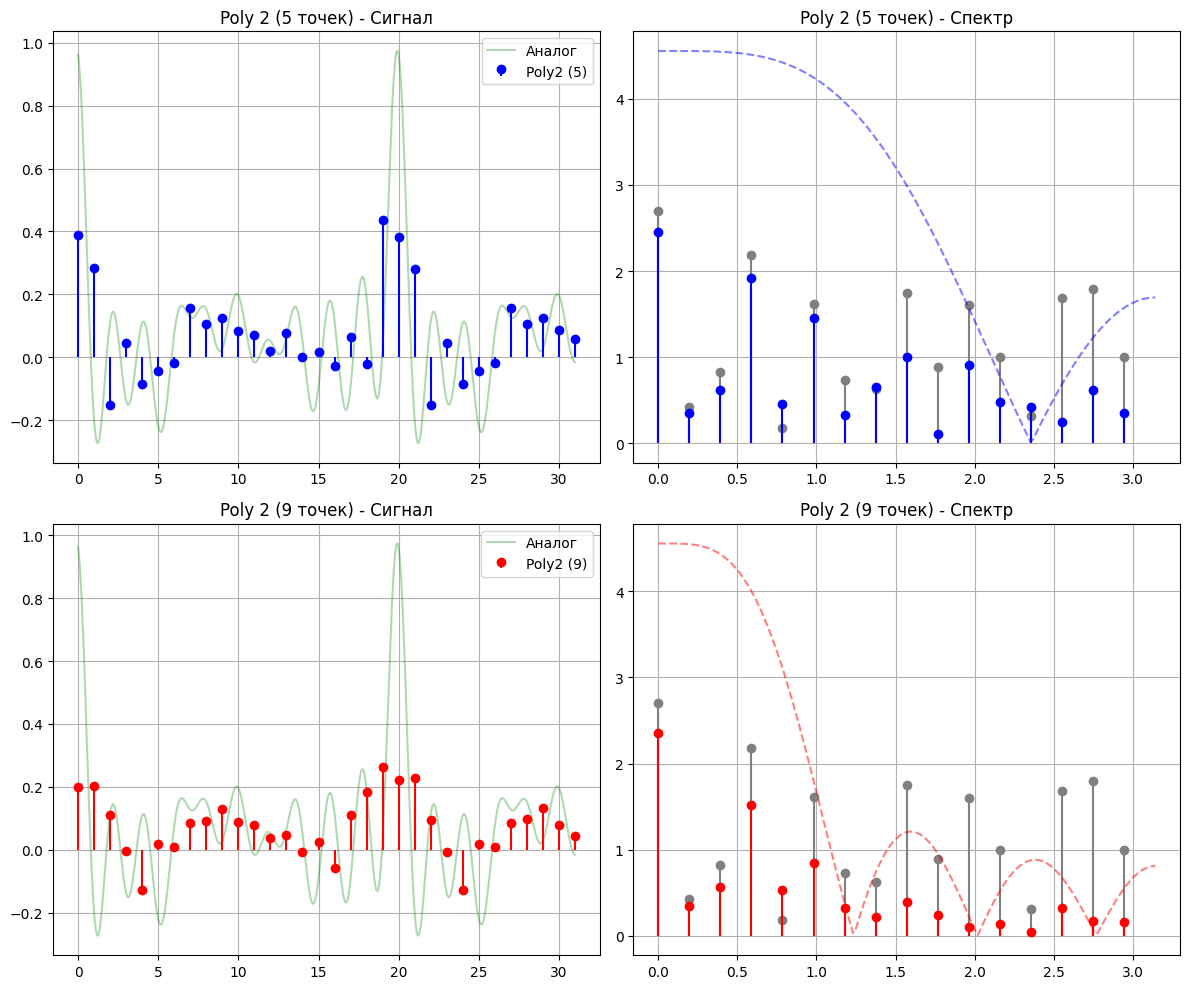

In [23]:
# Коэффициенты
h_poly2_5 = np.array([-3, 12, 17, 12, -3]) / 35.0
h_poly2_9 = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231.0

# Фильтрация
s_poly2_5 = apply_filter(s_discrete, h_poly2_5)
s_poly2_9 = apply_filter(s_discrete, h_poly2_9)

# Спектры
S_poly2_5_spec = np.fft.fft(s_poly2_5)
S_poly2_9_spec = np.fft.fft(s_poly2_9)

# Функции АЧХ для отображения
def H_poly2_5_func(w):
    return np.abs((17 + 24*np.cos(w) - 6*np.cos(2*w)) / 35)

def H_poly2_9_func(w):
    return np.abs((59 + 108*np.cos(w) + 78*np.cos(2*w) + 28*np.cos(3*w) - 42*np.cos(4*w)) / 231)

# Визуализация
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(t_analog, s_analog, 'g', alpha=0.3, label='Аналог')
plt.stem(t_discrete, s_poly2_5, linefmt='b-', markerfmt='bo', basefmt=" ", label='Poly2 (5)')
plt.title("Poly 2 (5 точек) - Сигнал")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(omegas_fft[:half_n], np.abs(S_spectrum[:half_n]), linefmt='grey', basefmt=" ")
plt.stem(omegas_fft[:half_n], np.abs(S_poly2_5_spec[:half_n]), linefmt='b-', markerfmt='bo', basefmt=" ")
plt.plot(w_dense, H_poly2_5_func(w_dense) * np.max(np.abs(S_spectrum)), 'b--', alpha=0.5)
plt.title("Poly 2 (5 точек) - Спектр")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t_analog, s_analog, 'g', alpha=0.3, label='Аналог')
plt.stem(t_discrete, s_poly2_9, linefmt='r-', markerfmt='ro', basefmt=" ", label='Poly2 (9)')
plt.title("Poly 2 (9 точек) - Сигнал")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(omegas_fft[:half_n], np.abs(S_spectrum[:half_n]), linefmt='grey', basefmt=" ")
plt.stem(omegas_fft[:half_n], np.abs(S_poly2_9_spec[:half_n]), linefmt='r-', markerfmt='ro', basefmt=" ")
plt.plot(w_dense, H_poly2_9_func(w_dense) * np.max(np.abs(S_spectrum)), 'r--', alpha=0.5)
plt.title("Poly 2 (9 точек) - Спектр")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Анализ Poly 2
Фильтры на основе полинома 2-й степени имеют более широкую полосу пропускания по сравнению с линейными фильтрами той же длины. Они лучше сохраняют низкочастотные компоненты сигнала, но хуже подавляют высокочастотный шум. Увеличение числа точек (с 5 до 9) сужает полосу пропускания, увеличивая подавление ВЧ.

#### Сглаживание полиномом 4-й степени
1. **По 7 точкам** ($m=3$). Коэффициенты: $\frac{1}{231}[5, -30, 75, 131, 75, -30, 5]$.
   $$H(\omega) = \frac{1}{231}(131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega))$$
2. **По 11 точкам** ($m=5$). Коэффициенты: $\frac{1}{429}[18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]$.
   $$H(\omega) = \frac{1}{429}(143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega))$$

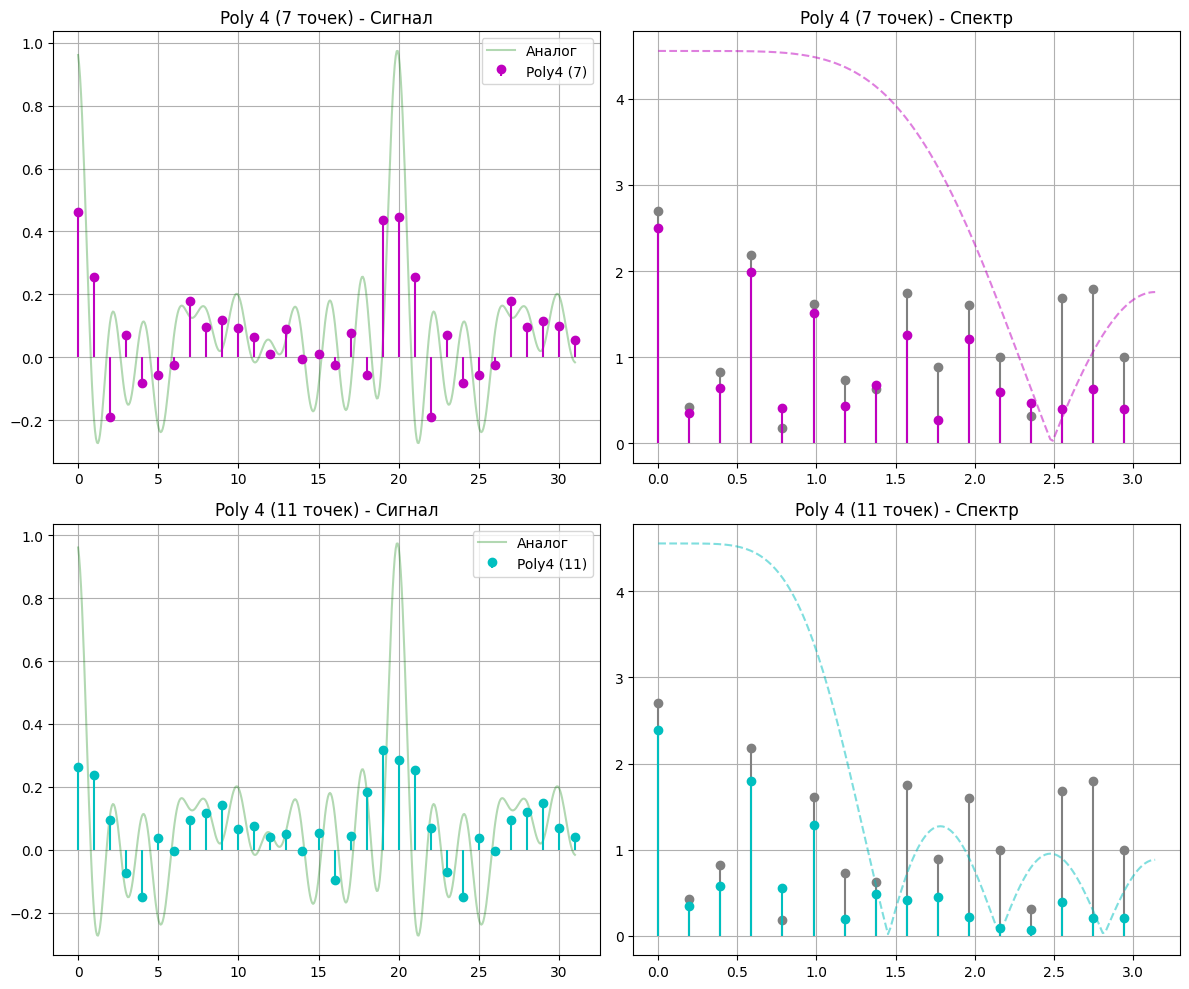

In [24]:
# Коэффициенты
h_poly4_7 = np.array([5, -30, 75, 131, 75, -30, 5]) / 231.0
h_poly4_11 = np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429.0

# Фильтрация
s_poly4_7 = apply_filter(s_discrete, h_poly4_7)
s_poly4_11 = apply_filter(s_discrete, h_poly4_11)

# Спектры
S_poly4_7_spec = np.fft.fft(s_poly4_7)
S_poly4_11_spec = np.fft.fft(s_poly4_11)

# Функции АЧХ
def H_poly4_7_func(w):
    return np.abs((131 + 150*np.cos(w) - 60*np.cos(2*w) + 10*np.cos(3*w)) / 231)

def H_poly4_11_func(w):
    return np.abs((143 + 240*np.cos(w) + 120*np.cos(2*w) - 20*np.cos(3*w) - 90*np.cos(4*w) + 36*np.cos(5*w)) / 429)

# Визуализация
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(t_analog, s_analog, 'g', alpha=0.3, label='Аналог')
plt.stem(t_discrete, s_poly4_7, linefmt='m-', markerfmt='mo', basefmt=" ", label='Poly4 (7)')
plt.title("Poly 4 (7 точек) - Сигнал")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(omegas_fft[:half_n], np.abs(S_spectrum[:half_n]), linefmt='grey', basefmt=" ")
plt.stem(omegas_fft[:half_n], np.abs(S_poly4_7_spec[:half_n]), linefmt='m-', markerfmt='mo', basefmt=" ", label='Poly4 (7)')
plt.plot(w_dense, H_poly4_7_func(w_dense) * np.max(np.abs(S_spectrum)), 'm--', alpha=0.5)
plt.title("Poly 4 (7 точек) - Спектр")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t_analog, s_analog, 'g', alpha=0.3, label='Аналог')
plt.stem(t_discrete, s_poly4_11, linefmt='c-', markerfmt='co', basefmt=" ", label='Poly4 (11)')
plt.title("Poly 4 (11 точек) - Сигнал")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(omegas_fft[:half_n], np.abs(S_spectrum[:half_n]), linefmt='grey', basefmt=" ")
plt.stem(omegas_fft[:half_n], np.abs(S_poly4_11_spec[:half_n]), linefmt='c-', markerfmt='co', basefmt=" ", label='Poly4 (11)')
plt.plot(w_dense, H_poly4_11_func(w_dense) * np.max(np.abs(S_spectrum)), 'c--', alpha=0.5)
plt.title("Poly 4 (11 точек) - Спектр")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Анализ Poly 4
Фильтры на основе полинома 4-й степени имеют еще более широкую полосу пропускания, чем Poly 2. Они минимально искажают полезный сигнал (низкие частоты), но и подавление высоких частот у них самое слабое. Это компромисс между сохранением формы сигнала и удалением шума.

### Пункт 9: Общий вывод

В ходе работы были исследованы различные нерекурсивные фильтры сглаживания:
1.  Линейное сглаживание (прямоугольное окно) обладает самой узкой полосой пропускания. Оно эффективно подавляет шум, но вносит значительные искажения в полезный сигнал, "размазывая" его.
2.  Полиномиальное сглаживание 2-й степени расширяет полосу пропускания, лучше сохраняя детали сигнала, но пропуская больше шума.
3.  Полиномиальное сглаживание 4-й степени имеет самую широкую полосу пропускания среди рассмотренных, обеспечивая наименьшее искажение сигнала, но и наименьшее подавление ВЧ помех.

Увеличение количества точек сглаживания (размера окна) для любого типа фильтра приводит к сужению полосы пропускания и усилению подавления высоких частот.